<h1>Transverse Laser Beam Intensity Distribution Analisys</h1>

<h5>Description</h5>
<p>Apart from enhancing the brightness of the master beam, solid state laser amplifier also distorts transverse beam intensity distribution due to uneven gain across the rod. This notebook is aimed to figure out gain map of the laser amplifier based on intensity distributions of the beam obtained from <a href=\"https://en.wikipedia.org/wiki/Charge-coupled_device">CCD camera</a> during the experiment.</p>
<p>The wavelength of a laser beam is 1064 nm, it is emitted by q-switched <a href=\"https://en.wikipedia.org/wiki/Nd:YAG_laser">Nd:YAG</a> laser. The amplifier has also a Nd:YAG rod surrounded by laser diode arrays for pumping. </p> 
<p>The object of research in this particular notebook is amplification of a small signal. <p/>

<h5>Import libraries</h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sb

<h5>Import and clean csv files</h5>
<p>Import master beam csv file using pandas:</p>

In [2]:
master_pulse = pd.read_table('data/data_preamp_fixed_design/master/1. master_0001.ascii.csv', sep=',', \
              header = None)

print(f'The dimensions of the dataframe is {master_pulse.shape}')

master_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,983,984,985,986,987,988,989,990,991,992
0,71.468750,53.937500,16.562500,55.468750,108.578125,60.062500,31.421875,45.562500,-23.890625,18.156250,...,99.125000,96.187500,51.046875,-9.875000,78.968750,3.109375,94.125000,88.718750,28.515625,NaN
1,-9.953125,-1.375000,9.937500,56.171875,50.093750,-25.078125,0.812500,108.703125,69.093750,30.265625,...,17.328125,72.203125,79.093750,107.015625,92.562500,-8.515625,-35.093750,-44.875000,66.203125,NaN
2,30.062500,24.015625,71.312500,70.640625,144.093750,100.312500,85.375000,76.093750,44.937500,4.093750,...,45.593750,-3.359375,54.828125,43.781250,-2.718750,66.625000,50.578125,44.328125,22.609375,NaN
3,59.656250,84.046875,70.593750,-21.000000,43.828125,79.109375,29.828125,-18.515625,66.156250,13.859375,...,38.718750,11.171875,0.828125,23.250000,-36.234375,3.156250,69.968750,33.593750,81.421875,NaN
4,95.890625,99.703125,72.234375,72.453125,-21.906250,45.000000,75.265625,59.937500,10.687500,97.406250,...,-4.546875,-33.515625,20.703125,30.921875,68.390625,12.359375,111.421875,39.859375,126.906250,NaN


<p>Clean master beam profile from non-numeric values:</p>

In [3]:
#drop last column with Nan values
last_column_number = master_pulse.shape[1] - 1
print(last_column_number)
master_pulse = master_pulse.drop(master_pulse.columns[last_column_number],\
                                 axis = 1,)

master_pulse.head()

992


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,71.468750,53.937500,16.562500,55.468750,108.578125,60.062500,31.421875,45.562500,-23.890625,18.156250,...,12.500000,99.125000,96.187500,51.046875,-9.875000,78.968750,3.109375,94.125000,88.718750,28.515625
1,-9.953125,-1.375000,9.937500,56.171875,50.093750,-25.078125,0.812500,108.703125,69.093750,30.265625,...,15.828125,17.328125,72.203125,79.093750,107.015625,92.562500,-8.515625,-35.093750,-44.875000,66.203125
2,30.062500,24.015625,71.312500,70.640625,144.093750,100.312500,85.375000,76.093750,44.937500,4.093750,...,-4.703125,45.593750,-3.359375,54.828125,43.781250,-2.718750,66.625000,50.578125,44.328125,22.609375
3,59.656250,84.046875,70.593750,-21.000000,43.828125,79.109375,29.828125,-18.515625,66.156250,13.859375,...,103.390625,38.718750,11.171875,0.828125,23.250000,-36.234375,3.156250,69.968750,33.593750,81.421875
4,95.890625,99.703125,72.234375,72.453125,-21.906250,45.000000,75.265625,59.937500,10.687500,97.406250,...,80.640625,-4.546875,-33.515625,20.703125,30.921875,68.390625,12.359375,111.421875,39.859375,126.906250


<p>Import amplified beam profile and clean from non-numeric values:</p>

In [4]:
amplified_pulse = pd.read_table('data/data_preamp_fixed_design/amplified_ch1/3. amp_ch1_0002.ascii.csv', \
                                sep=',',header = None)

print(f'The dimensions of the dataframe is {amplified_pulse.shape}')

amplified_pulse = amplified_pulse.drop(amplified_pulse.columns[last_column_number],\
                                         axis = 1,)

amplified_pulse.head()

The dimensions of the dataframe is (656, 993)


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
0,200.109375,90.500000,159.500000,146.000000,237.546875,239.593750,169.671875,262.265625,193.000000,228.625000,...,171.375000,60.500000,100.671875,14.156250,112.843750,85.531250,36.187500,107.390625,74.437500,33.703125
1,257.937500,213.359375,225.031250,152.890625,192.593750,133.421875,151.781250,274.500000,225.984375,234.296875,...,159.953125,115.187500,141.390625,20.140625,67.718750,82.578125,117.453125,103.875000,106.703125,142.125000
2,197.031250,219.718750,180.015625,172.343750,154.171875,196.250000,224.890625,218.375000,193.921875,264.671875,...,122.906250,91.531250,102.562500,96.515625,48.640625,101.015625,178.359375,89.000000,163.437500,99.734375
3,146.687500,151.062500,161.000000,62.375000,292.171875,207.734375,197.109375,254.125000,188.953125,166.937500,...,177.203125,106.125000,134.531250,115.312500,113.203125,70.734375,96.859375,85.218750,86.046875,18.843750
4,246.500000,147.468750,170.625000,221.812500,236.140625,201.453125,160.750000,287.468750,187.421875,246.140625,...,122.781250,75.859375,73.687500,28.453125,89.703125,160.750000,184.031250,178.875000,47.265625,135.468750


<p>Now we have two dataframes of identical size. To estimate intensity values of the signal it is convinient to plot one column from the center of the beam profile (central vertical pixel row).</p>

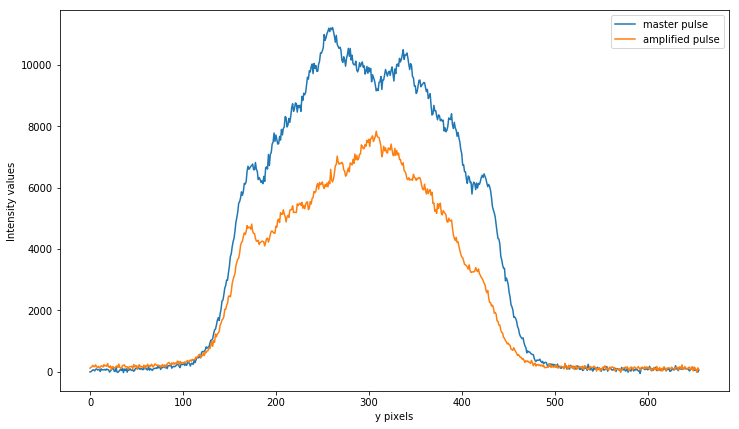

In [5]:
plt.figure(figsize=(12,7))
plt.plot(master_pulse[last_column_number / 2], \
         label = 'master pulse')
plt.plot(amplified_pulse[last_column_number / 2], \
         label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.xlabel('y pixels')
plt.ylabel('Intensity values')
plt.show()

<p>The graph above does not display the real intensity ratio because the sensitivity of the sensor has been changed for amplified beam measurement. Giving the fact that amplified pulse energy equals approximatly two times the enegy of master beam we should multiply amplified dataframe by two.</p>

In [6]:
master_p_energy = 0.19
amplified_p_energy = 0.5
magnification_factor = amplified_p_energy / master_p_energy
amplified_pulse = pd.DataFrame(amplified_pulse.values * magnification_factor,\
                               columns = amplified_pulse.columns,\
                               index = amplified_pulse.index)


<p>Plot central pixel row again and both maps:</p>

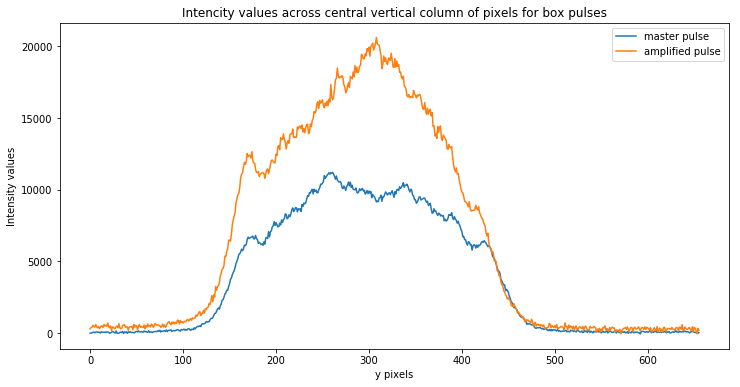

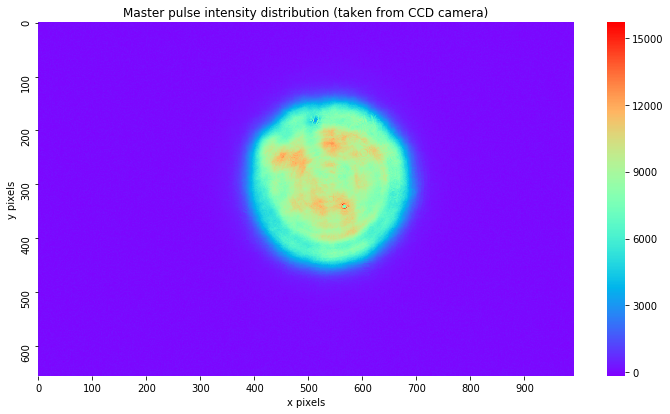

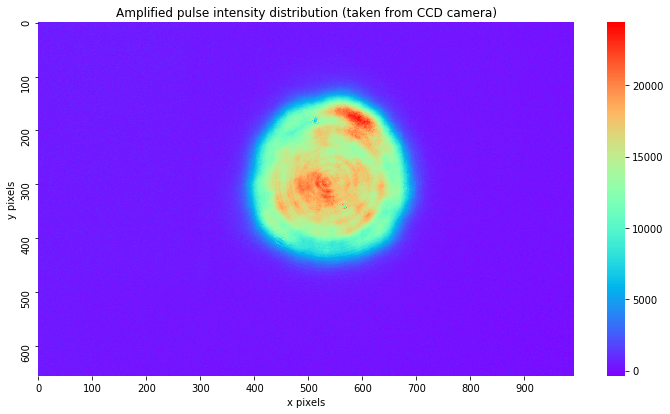

In [7]:
plt.figure(figsize=(12,6))
plt.plot(master_pulse[last_column_number / 2], label = 'master pulse')
plt.plot(amplified_pulse[last_column_number / 2], label = 'amplified pulse')
plt.legend(loc = 'upper right')
plt.xlabel('y pixels')
plt.ylabel('Intensity values')
plt.title('Intencity values across central vertical column of pixels for box pulses')
plt.show()


plt.figure(figsize=(12, 6.5))
master_pulse_map = sb.heatmap(master_pulse, xticklabels = 100, \
                              yticklabels = 100, \
                              cmap = 'rainbow')
plt.title('Master pulse intensity distribution (taken from CCD camera)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

plt.figure(figsize=(12, 6.5))
amplified_pulse_map = sb.heatmap(amplified_pulse, xticklabels = 100, \
                                 yticklabels = 100, \
                                 cmap = 'rainbow')
plt.title('Amplified pulse intensity distribution (taken from CCD camera)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

<h5>Calculate gain distribution across the amplifier rod</h5>
<p>To figure out "gain" distribution across the amplifier rod we should divide amplified pulse dataframe values by master pulse dataframe values. To accomplish this we should filter zero and negative values from both dataframes.</p>

In [8]:
filter_value = 400

mask = master_pulse < filter_value
master_pulse.iloc[mask] = filter_value

mask_amp = amplified_pulse < filter_value
amplified_pulse.iloc[mask] = filter_value

<h5>Plot gain distribution across the amplifier rod</h5>
<p>Calculate gain values by dividing amplified_pulse dataframe by master_pulse dataframe:</p>

In [9]:
gain_values = pd.DataFrame(amplified_pulse.values / master_pulse.values,\
                           columns = amplified_pulse.columns,\
                           index = amplified_pulse.index)

<p>Plot central pixel row of gain values dataframe.</p>

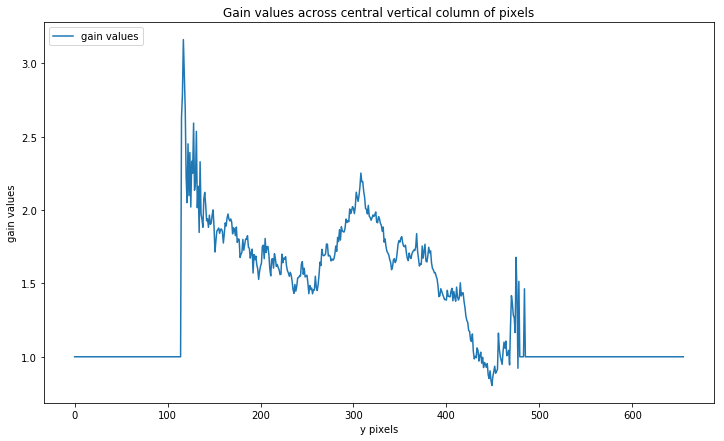

In [10]:
plt.figure(figsize=(12, 7))
plt.plot(gain_values[last_column_number / 2], label = 'gain values')
plt.legend(loc = 'upper left')
plt.xlabel('y pixels')
plt.ylabel('gain values')
plt.title('Gain values across central vertical column of pixels')
plt.show()

<p>Clear gain map from negative values for enhanced color representation:</p>

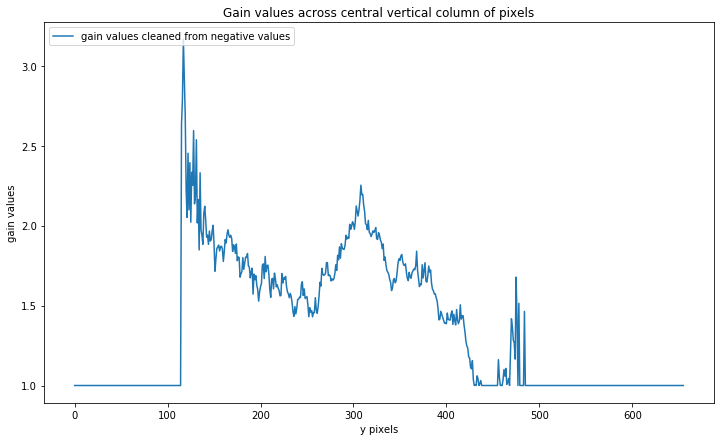

In [11]:
filter_value = 1

mask = gain_values < filter_value
gain_values.iloc[mask] = filter_value

plt.figure(figsize=(12, 7))
plt.plot(gain_values[last_column_number / 2], label = 'gain values cleaned from negative values')
plt.legend(loc = 'upper left')
plt.title('Gain values across central vertical column of pixels')
plt.xlabel('y pixels')
plt.ylabel('gain values')
plt.show()

<p>Make a 2d map of gain values using seaborn library:</p>

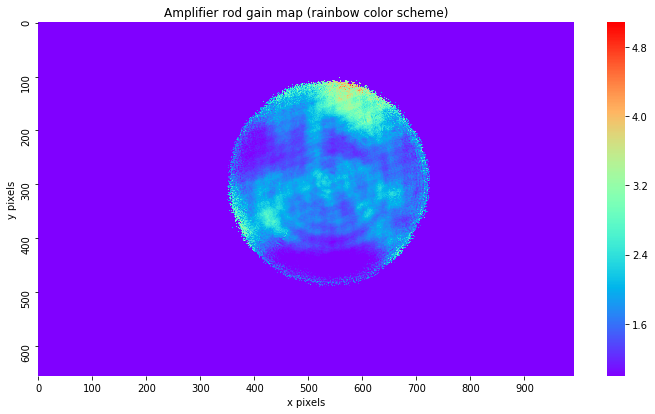

In [12]:
plt.figure(figsize=(12, 6.5))
gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100, \
                             cmap = 'rainbow')
plt.title('Amplifier rod gain map (rainbow color scheme)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

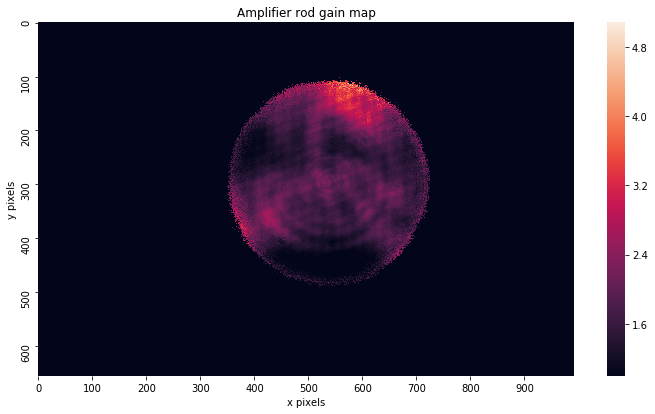

In [13]:
plt.figure(figsize=(12, 6.5))

gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100)
plt.title('Amplifier rod gain map')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.title('Amplifier rod gain map')
plt.show()

<p>Make a 3d surface plot of gain values. <b>Takes about 5 minutes on my macbook air.</b></p>

In [14]:
gain_values = gain_values.drop(master_pulse.columns[:340],\
                                 axis = 1,)

gain_values = gain_values.drop(master_pulse.columns[720:],\
                                 axis = 1,)

gain_values = gain_values.drop(master_pulse.index[:100])

gain_values = gain_values.drop(master_pulse.index[500:])


gain_values.head()



,340,341,342,343,344,345,346,347,348,349,...,710,711,712,713,714,715,716,717,718,719
100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
103,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


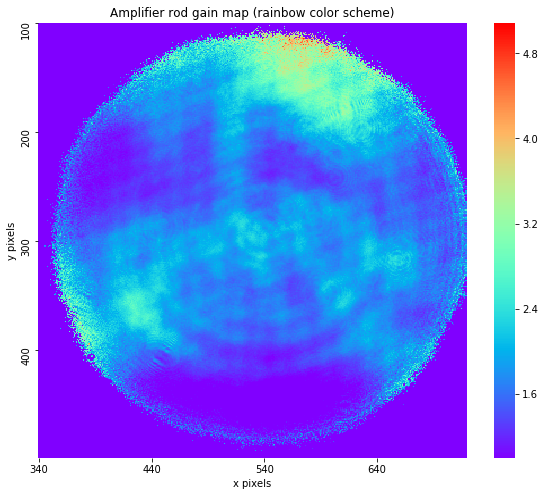

In [15]:
plt.figure(figsize=(9.6, 8))
gain_values_map = sb.heatmap(gain_values, xticklabels = 100, \
                             yticklabels = 100, \
                             cmap = 'rainbow')
plt.title('Amplifier rod gain map (rainbow color scheme)')
plt.xlabel('x pixels')
plt.ylabel('y pixels')
plt.show()

<h5>Conclusion</h5>
<p>As you can see on the picture above three laser diodes create an amplification map similar to radiation sign. It should be fixed.</p>

<h5>To do list</h5>
<p>Create .py file with csv processing library for such cases.</p>
<ul>
    <li>Import csv</li>
    <li>Clean csv</li>
    <li>Divide dataframe by dataframe</li>
    <li>Plot output</li>
    <li>Find mean of multiple dataframes</li>
</ul>